In [1]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')
sys.path

['',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/home/jbourbeau/.local/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/root-v5.34.18/lib',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/lib/python2.7/site-packages',
 '/data/user/jbourbeau/metaprojects/icerec/V05-00-00/build/lib',
 '/home/jbourbeau/cr-composition/analysis',
 '/home/jbourbeau',
 '/home/jbourbeau/useful',
 '/home/jbourbeau/anisotropy',
 '/home/jbourbeau/ShowerLLH_scripts',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python27.zip',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/pyth

In [2]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import radviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn.apionly as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve, GridSearchCV, cross_val_score, ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

import composition as comp

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
sns.set_palette('muted')
sns.set_color_codes()

In [5]:
df, cut_dict = comp.load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['lap_reco_success', 'lap_zenith', 'num_hits_1_30', 'IT_signal',
                     'StationDensity', 'max_qfrac_1_30', 'lap_containment', 'energy_range_lap']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]

feature_list, feature_labels = comp.get_training_features()
print('training features = {}'.format(feature_list))
X_train, X_test, y_train, y_test, le = comp.get_train_test_sets(
    df, feature_list)

print('number training events = ' + str(y_train.shape[0]))

training features = ['lap_log_energy', 'InIce_log_charge_1_30', 'lap_cos_zenith', 'NChannels_1_30', 'log_s125']
number training events = 62761


In [28]:
df['lap_chi2'][df['MC_comp'] == 'He'].values[:100]

array([ 0.01901159,  0.03803705,  0.05756442,  0.01651186,  0.05396545,
        0.01016009,  0.02782488,  0.02209644,  0.01310574,  0.01681135,
        0.06050614,  0.02359155,  0.02177396,  0.02898419,  0.02167685,
        0.03172986,  0.0261738 ,  0.02515741,  0.01344379,  0.02418718,
        0.03931341,  0.01773914,  0.01987854,  0.01538397,  0.02663515,
        0.02159335,  0.02111824,  0.0204653 ,  0.01627806,  0.02715841,
        0.02693535,  0.02071536,  0.01337762,  0.02013336,  0.01608184,
        0.02143361,  0.02946674,  0.01904559,  0.02905963,  0.01683309,
        0.01253416,  0.01698449,  0.01189633,  0.00799463,  0.00941288,
        0.01890209,  0.00927212,  0.01867145,  0.0128687 ,  0.01235261,
        0.02691016,  0.01105049,  0.01602301,  0.01262087,  0.01467557,
        0.00920216,  0.0075604 ,  0.00943705,  0.00891876,  0.0089907 ,
        0.00631558,  0.00551618,  0.00409265,  0.00613191,  0.00535737,
        0.00392395,  0.00387427,  0.0039161 ,  0.00481751,  0.03

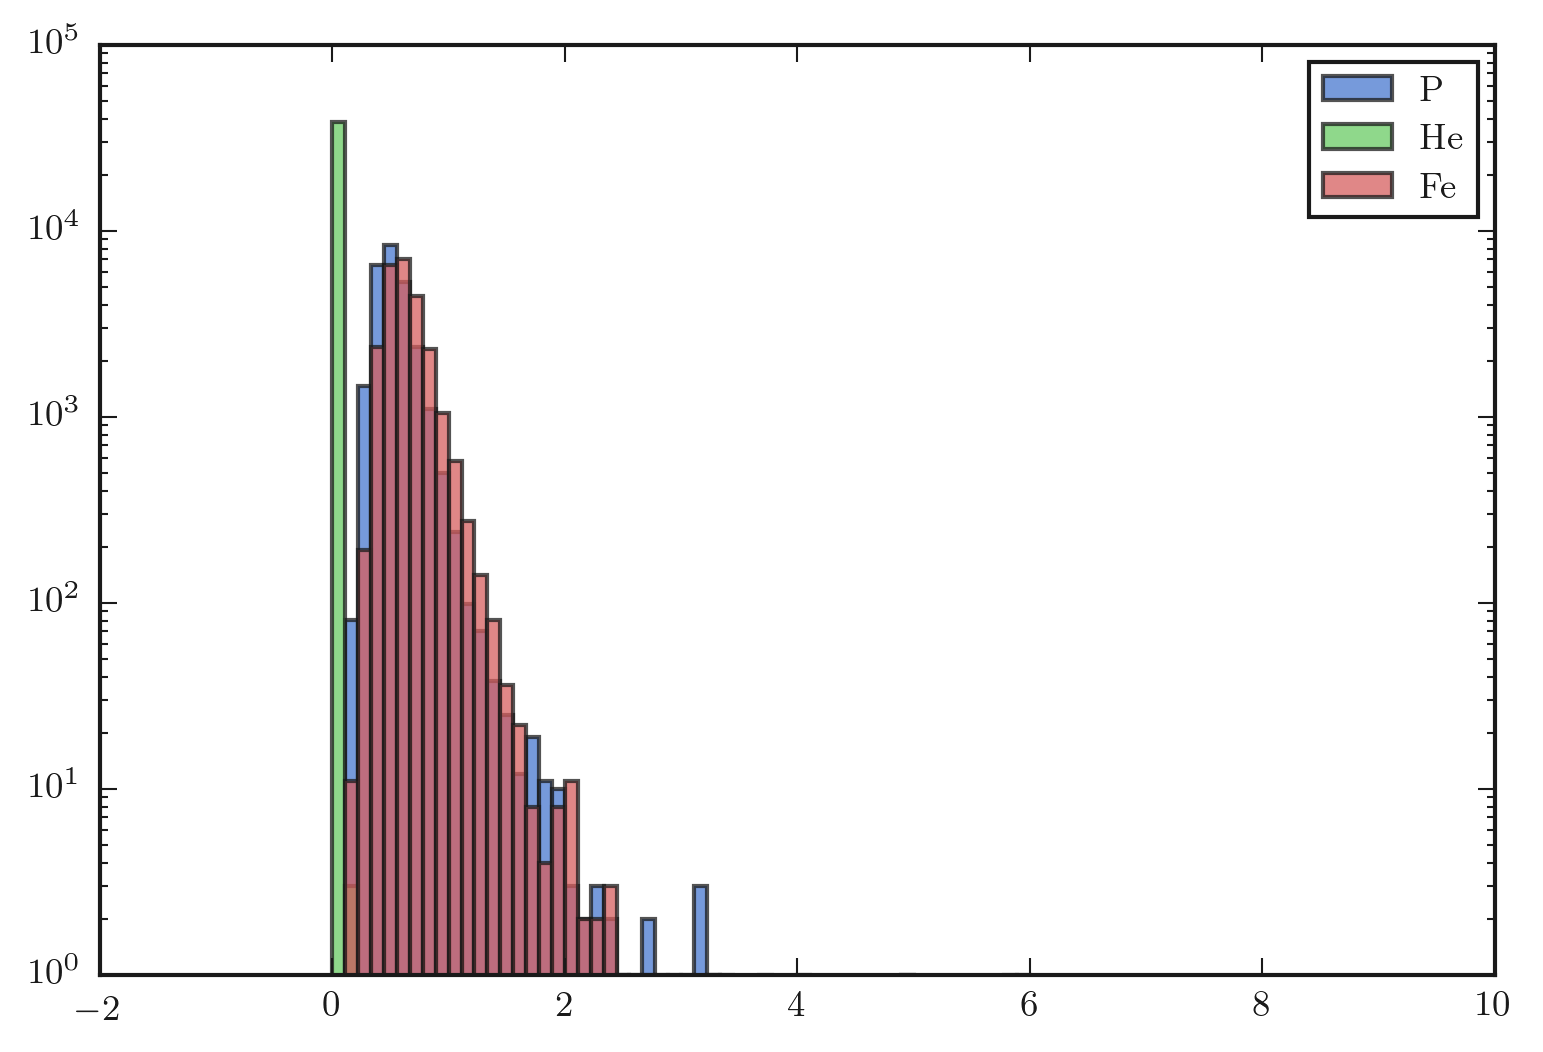

In [26]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    chi2 = df['lap_chi2'][df['MC_comp'] == composition]
    ax.hist(chi2, bins=np.linspace(-1, 10, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()

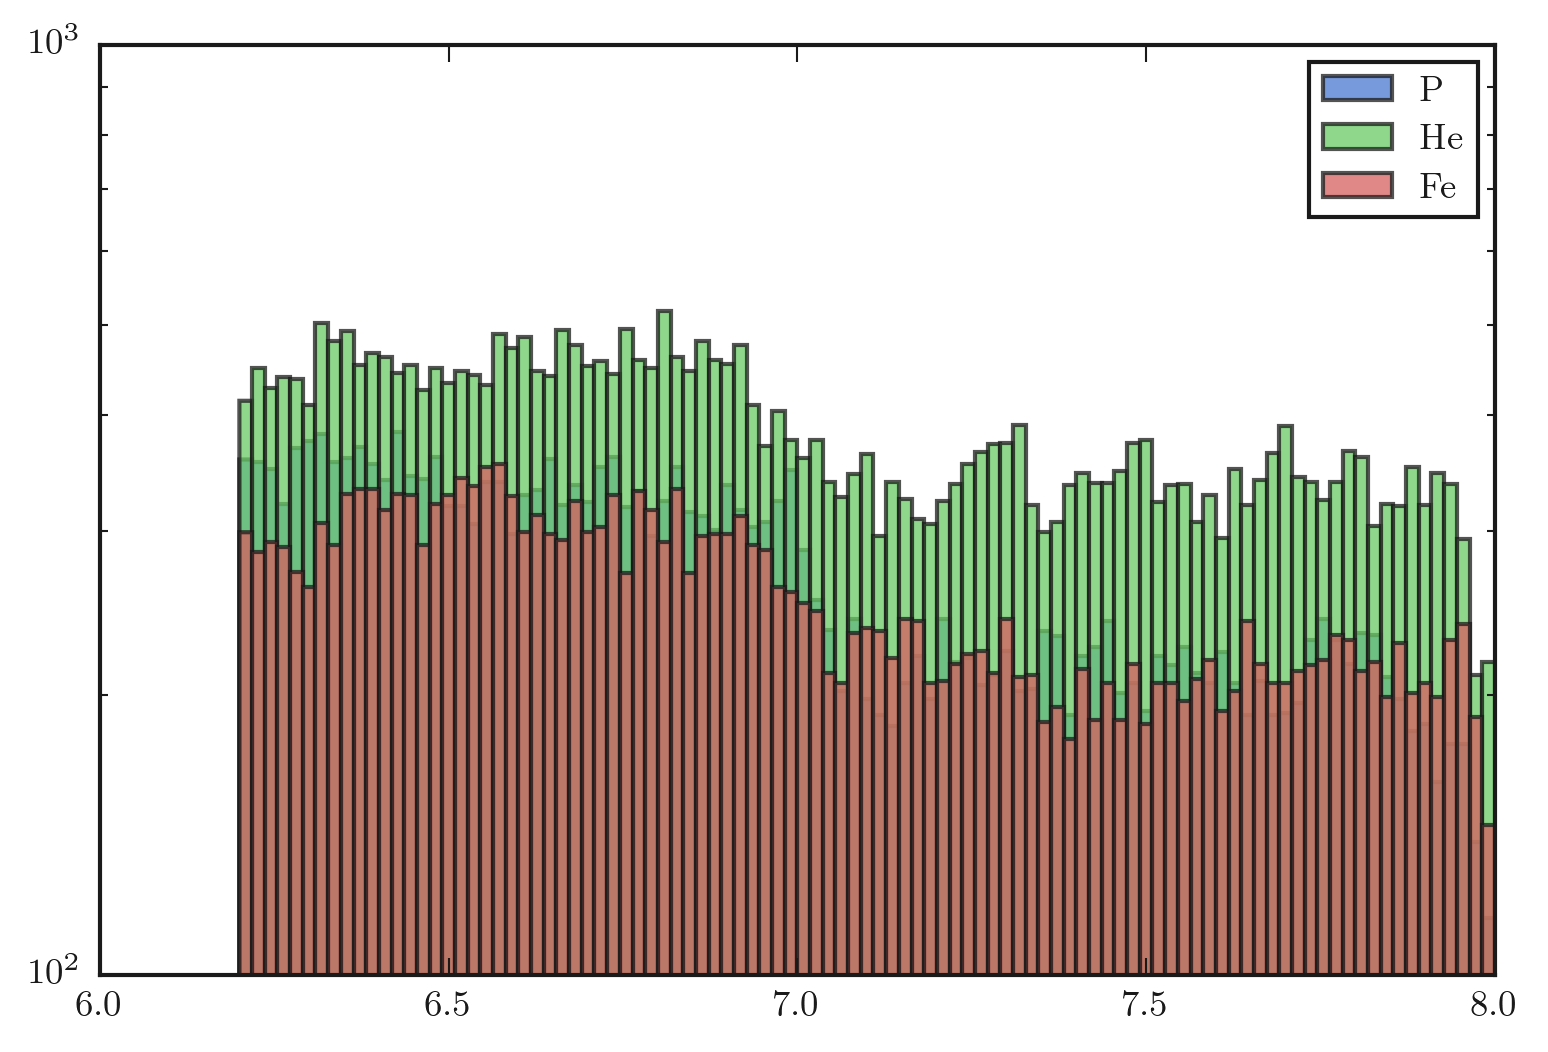

In [24]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    energy = df['lap_log_energy'][df['MC_comp'] == composition]
    ax.hist(energy, bins=np.linspace(6.2, 8, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()

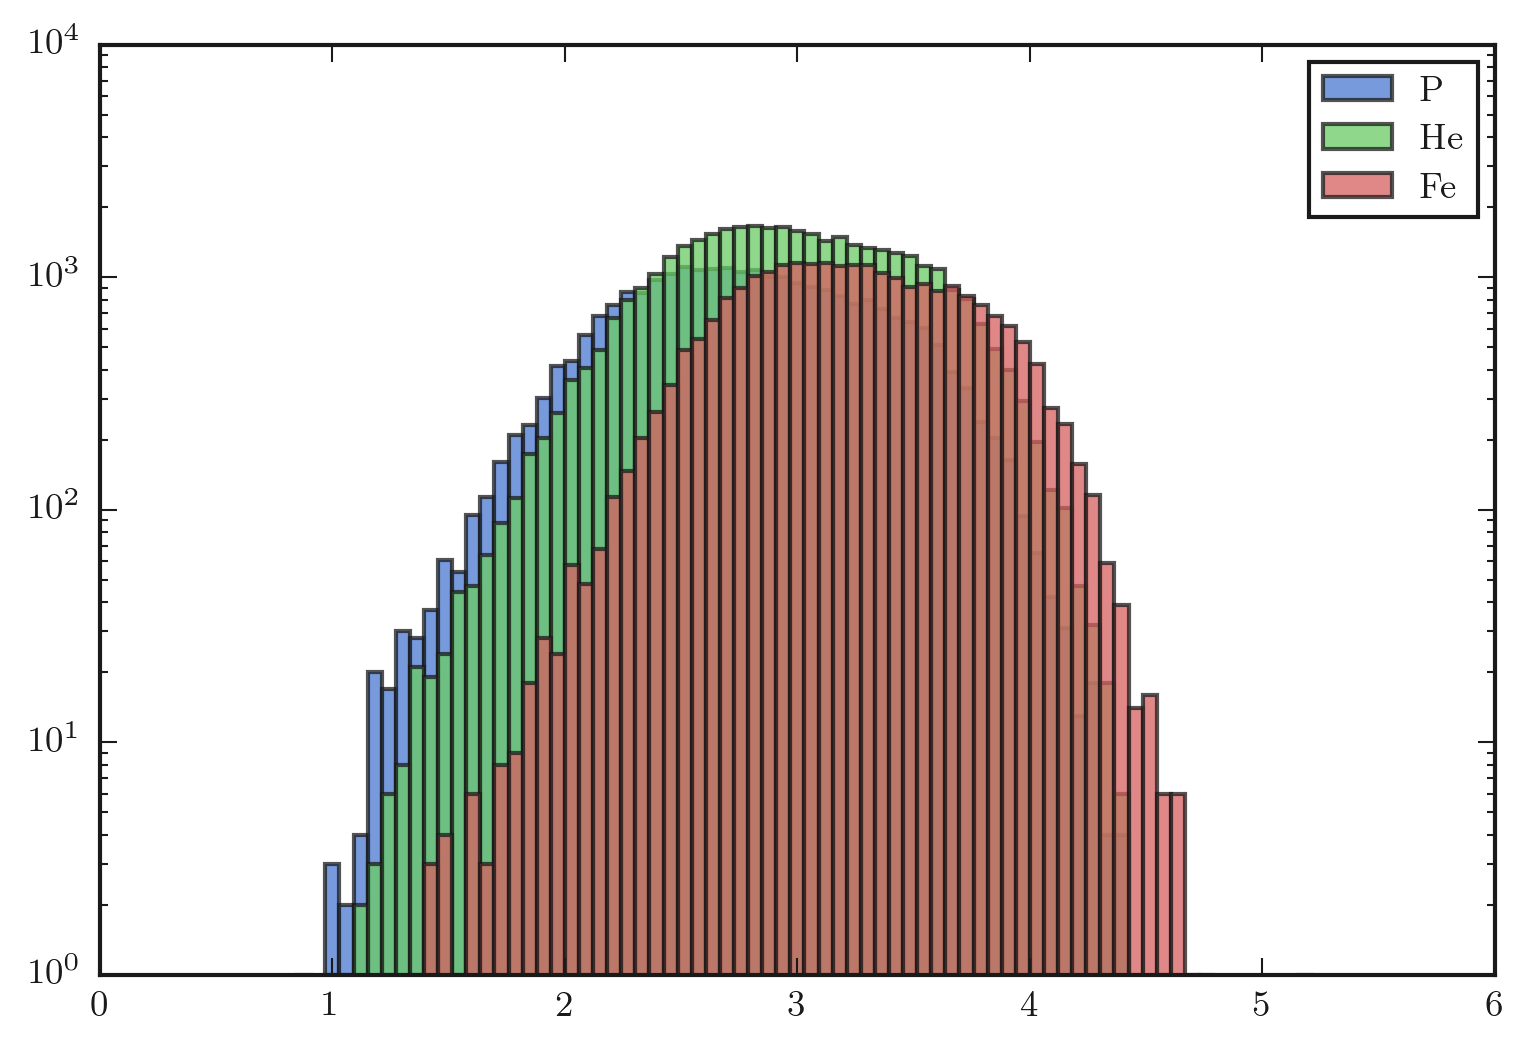

In [30]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    charge = df['InIce_log_charge_1_30'][df['MC_comp'] == composition]
    ax.hist(charge, bins=np.linspace(0, 6, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()

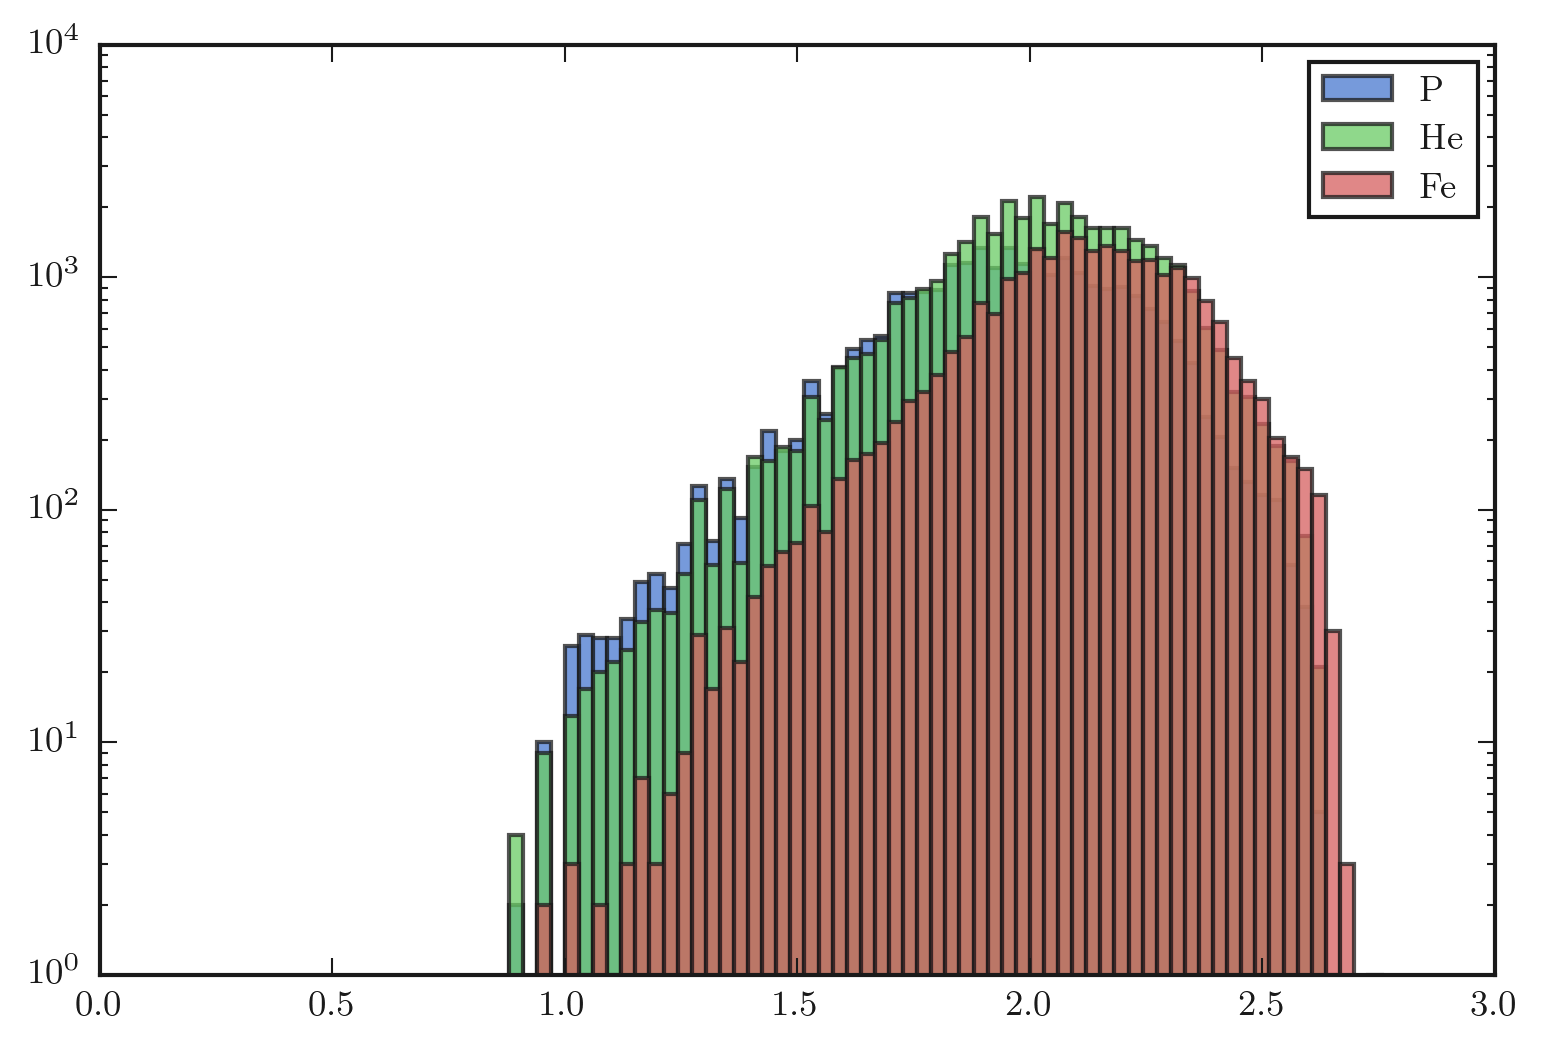

In [32]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    nchannels = df['log_NChannels_1_30'][df['MC_comp'] == composition]
    ax.hist(nchannels, bins=np.linspace(0, 3, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()

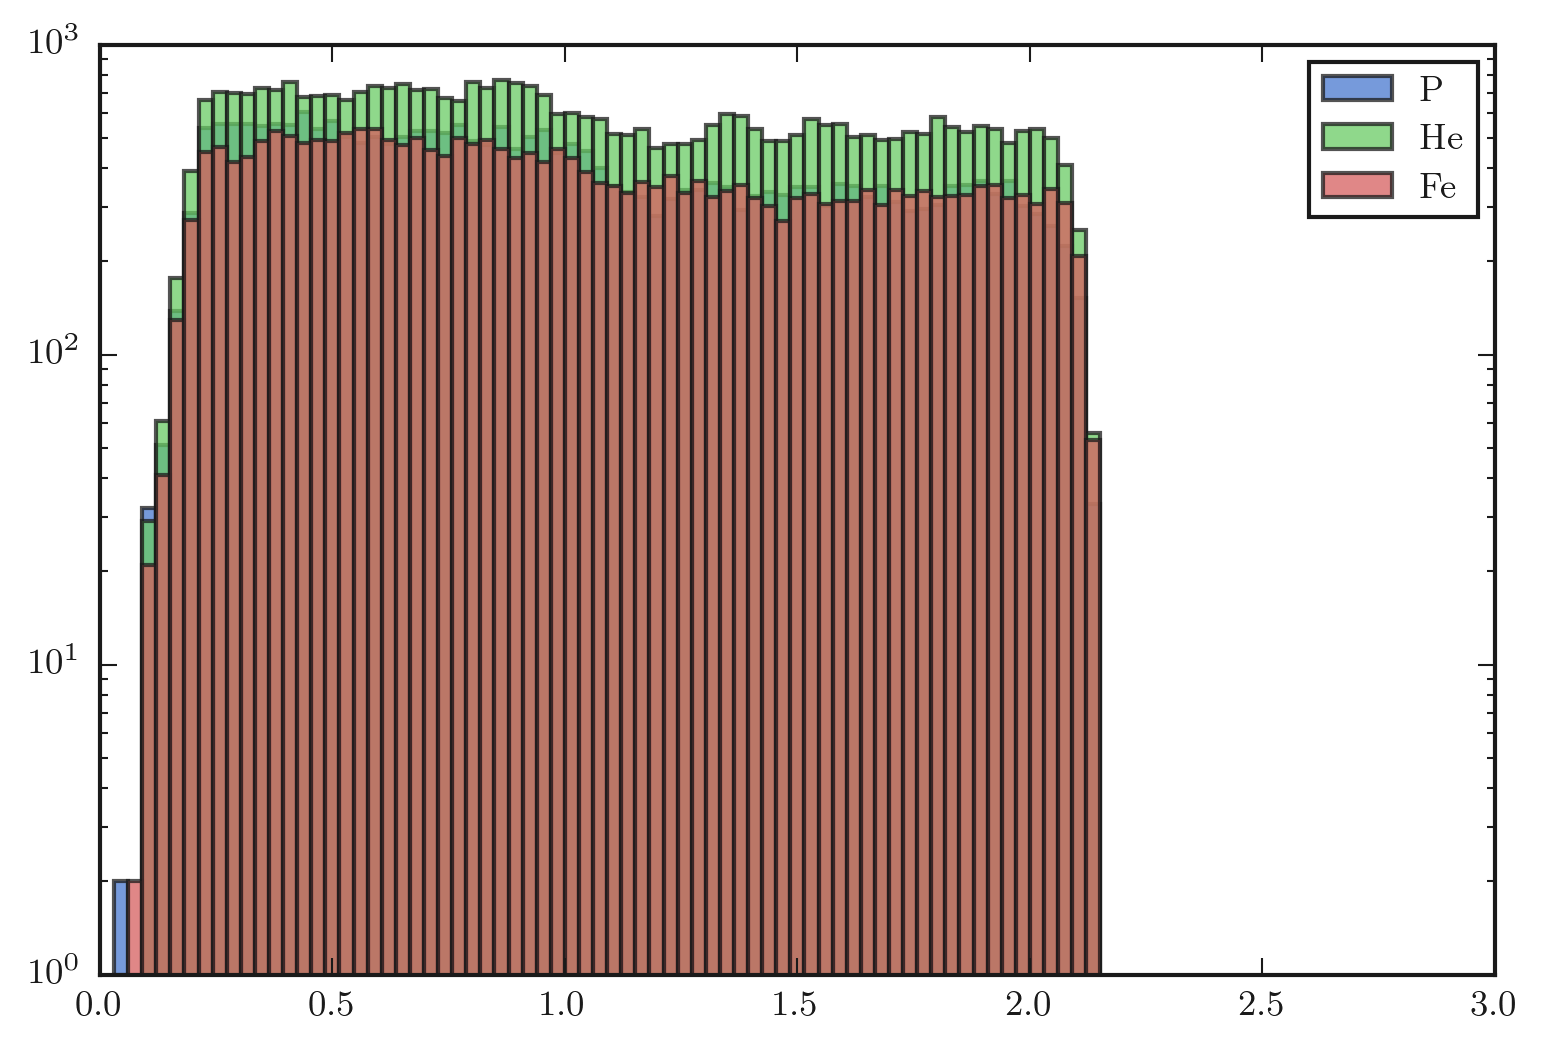

In [33]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    s125 = df['log_s125'][df['MC_comp'] == composition]
    ax.hist(s125, bins=np.linspace(0, 3, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()